In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [152]:
df=pd.read_csv('train.csv')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [153]:
df['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

In [154]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [155]:
df.duplicated().sum()

np.int64(313)

In [156]:
df=df.drop_duplicates()

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

In [158]:
df['Engine volume'].value_counts()

Engine volume
2            3856
2.5          2246
1.8          1743
1.6          1446
1.5          1289
             ... 
5.4 Turbo       1
0.3 Turbo       1
5.2             1
5.8             1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

In [159]:
df['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 18924, dtype: object

In [160]:
df['engine_volume_float'] = df['Engine volume'].str.extract(r'(\d+\.?\d*)')
df

C:\Users\Irfan Ahmed J\AppData\Local\Temp\ipykernel_17948\3775073788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_volume_float'] = df['Engine volume'].str.extract(r'(\d+\.?\d*)')


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,2.0
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,2.4
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,2
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,2


In [161]:
df['engine_volume_float'] = pd.to_numeric(df['engine_volume_float'])

C:\Users\Irfan Ahmed J\AppData\Local\Temp\ipykernel_17948\2809431862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine_volume_float'] = pd.to_numeric(df['engine_volume_float'])


In [162]:
df['mileage_number'] = df['Mileage'].str.extract(r'(\d+)').astype(int)
df

C:\Users\Irfan Ahmed J\AppData\Local\Temp\ipykernel_17948\68650477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage_number'] = df['Mileage'].str.extract(r'(\d+)').astype(int)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float,mileage_number
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,186005
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,192000
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,1.3,200000
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,168966
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,91901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5,2.0,300000
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,2.4,161600
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,2.0,116365
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,2.0,51258


In [163]:
df[df['mileage_number']>200000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float,mileage_number
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12,1.8,258909
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12,2.4,216118
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12,2.5,398069
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4,1.6,350000
18,45772104,549,2386,HYUNDAI,Sonata,2006,Sedan,Yes,Petrol,3.3,295059 km,6.0,Automatic,Rear,04-May,Left wheel,Blue,12,3.3,295059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,45794580,8781,1107,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7 Turbo,236000 km,4.0,Manual,Front,04-May,Left wheel,Beige,4,1.7,236000
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0,3.0,220000
19227,45769427,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12,3.5,219030
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12,1.8,307325


In [164]:
df=df[df['mileage_number']<200000]

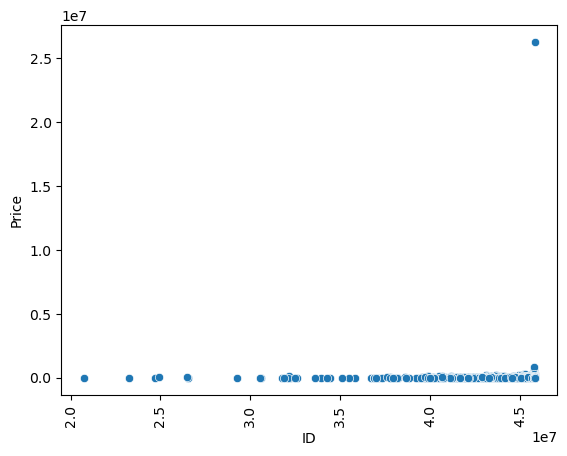

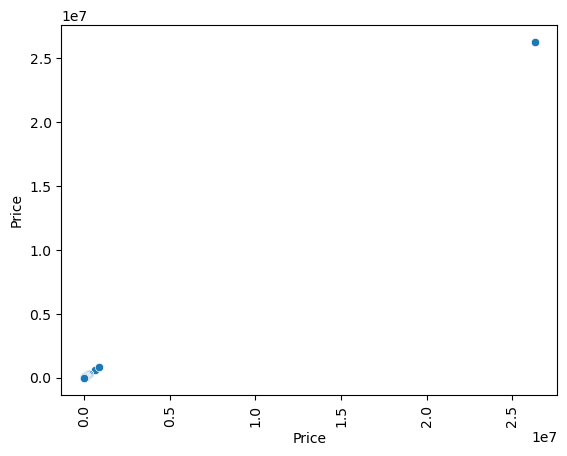

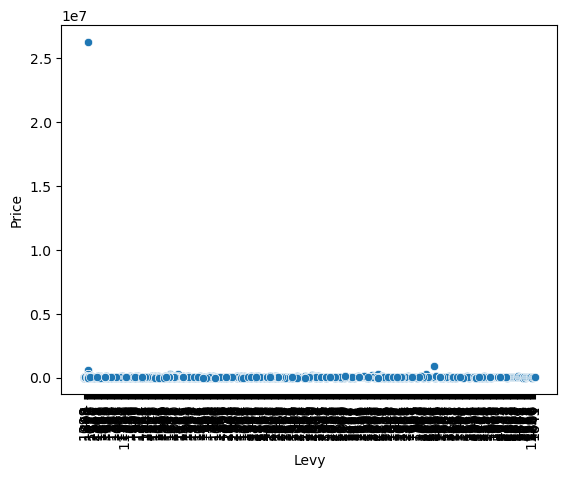

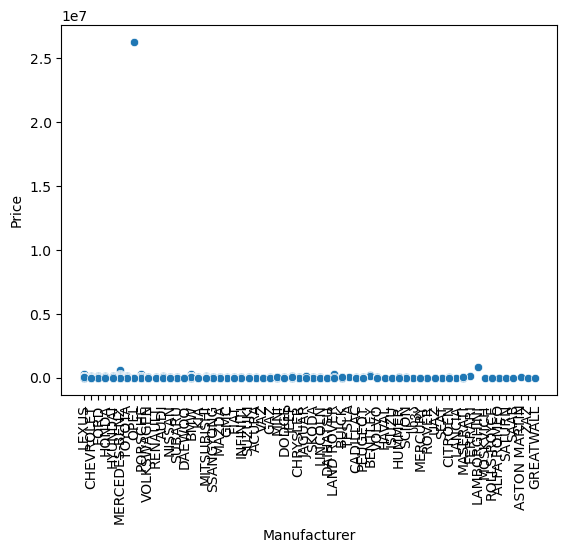

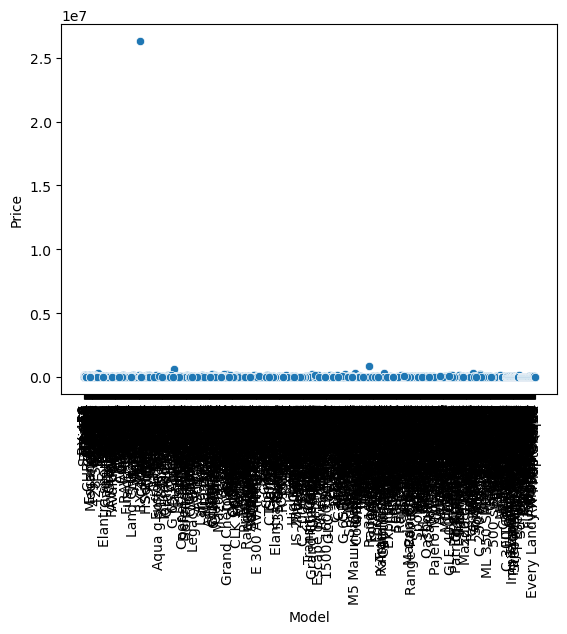

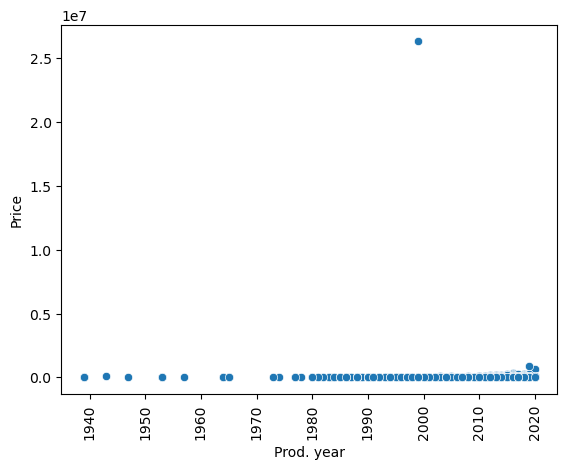

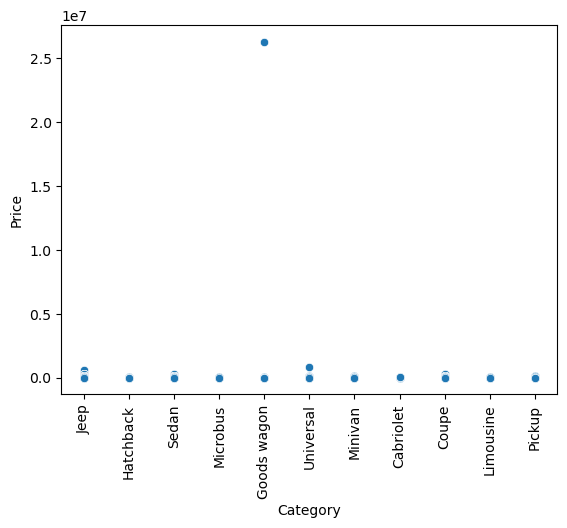

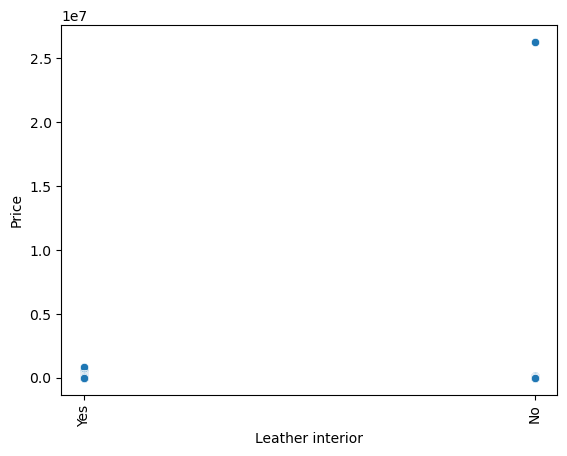

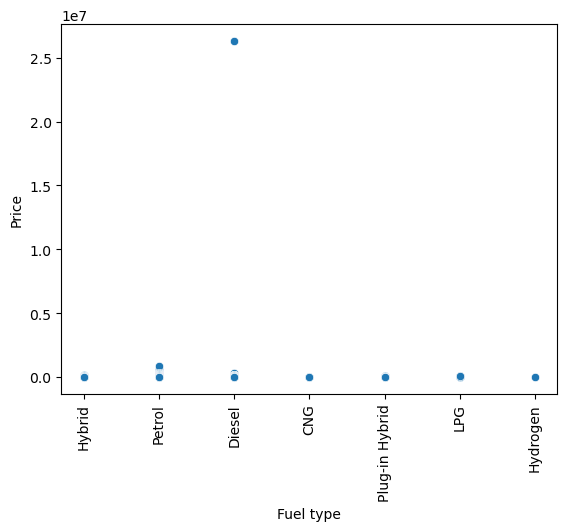

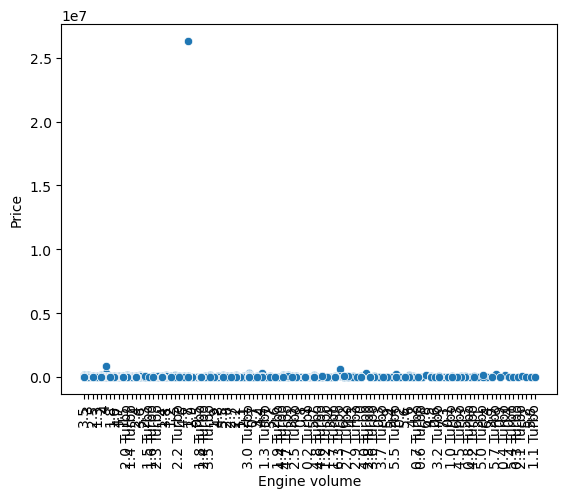

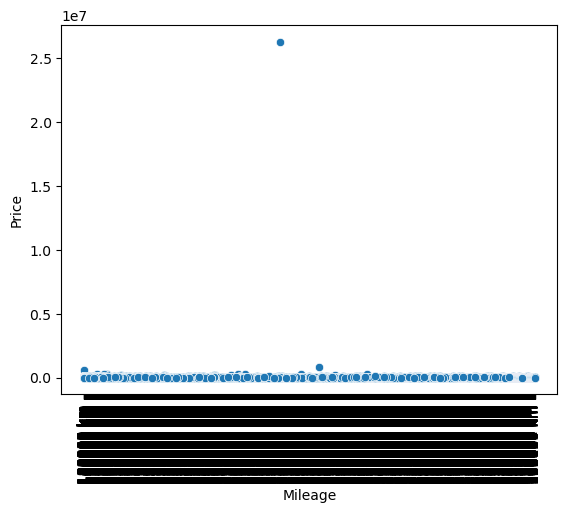

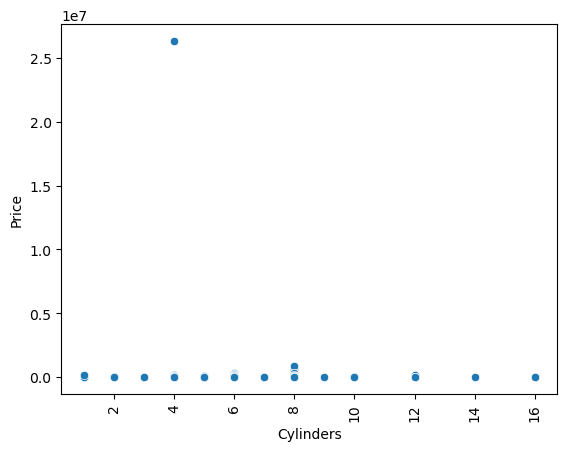

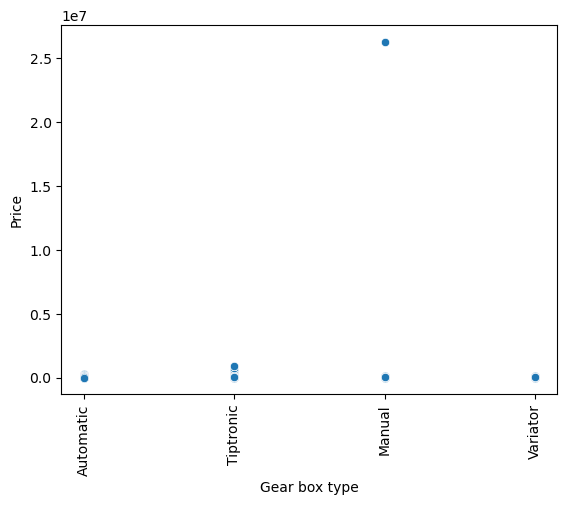

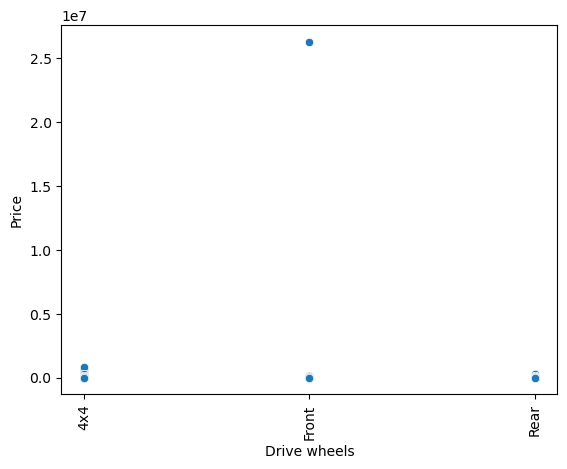

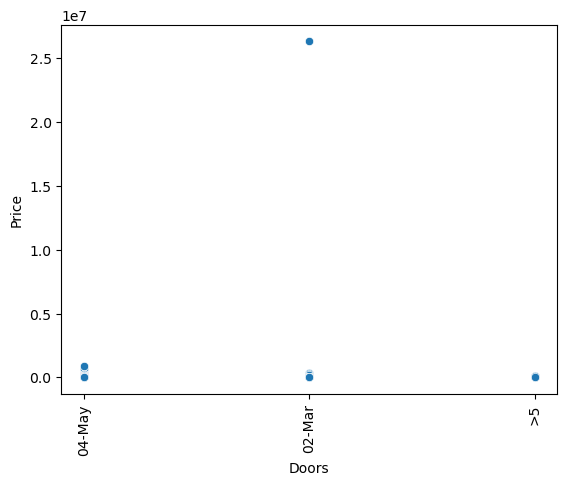

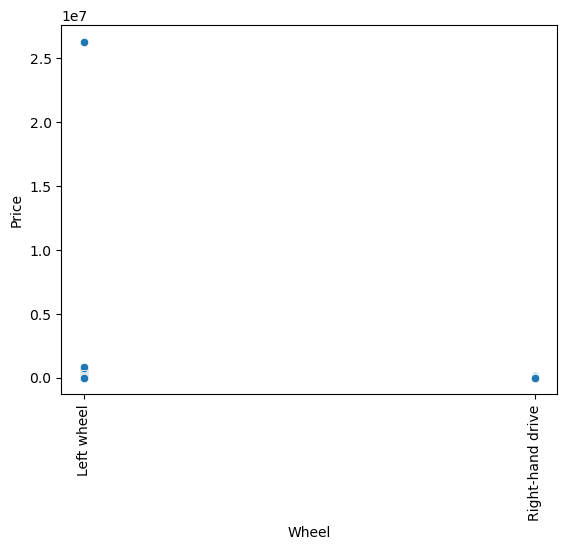

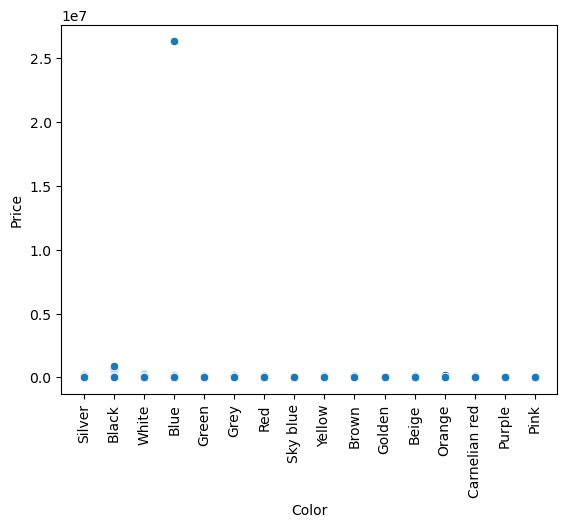

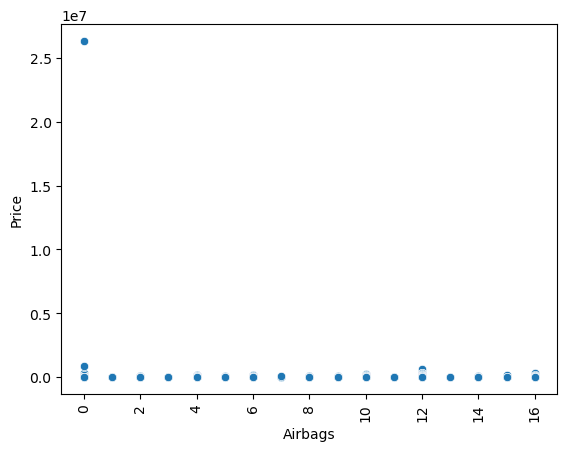

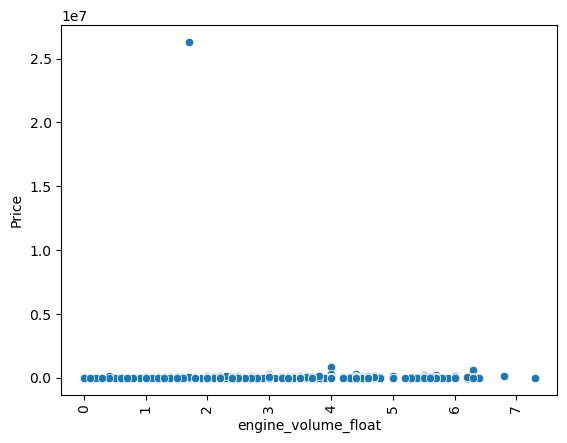

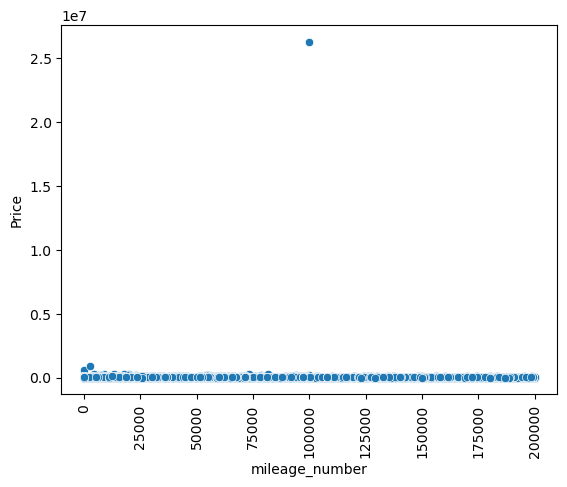

In [165]:
import seaborn as sns
for col in df.columns:
    sns.scatterplot(x=df[col],y=df['Price'])
    plt.xticks(rotation=90)
    plt.show()

In [166]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float,mileage_number
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,186005
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,192000
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,168966
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,91901
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4,2.0,160931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,3.5,107800
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,2.4,161600
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,2.0,116365
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,2.0,51258


In [167]:
df1=df[['engine_volume_float','mileage_number','Price']]
df1

,engine_volume_float,mileage_number,Price
0,3.5,186005,13328
1,3.0,192000,16621
3,2.5,168966,3607
4,1.3,91901,11726
5,2.0,160931,39493
...,...,...,...
19231,3.5,107800,5802
19233,2.4,161600,15681
19234,2.0,116365,26108
19235,2.0,51258,5331


In [168]:
df1.skew()

engine_volume_float      1.569765
mileage_number          -0.158357
Price                  119.690452
dtype: float64

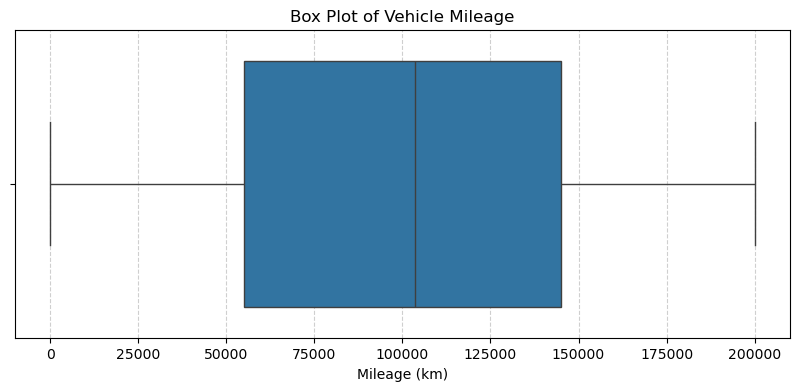

In [169]:
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['mileage_number'])
plt.title('Box Plot of Vehicle Mileage')
plt.xlabel('Mileage (km)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [170]:
df1.shape

(14742, 3)

In [171]:
df1[df1['mileage_number']>500000000]

,engine_volume_float,mileage_number,Price


In [172]:
df1 = df1[df1['mileage_number'] < 500000000]

In [173]:
df1.shape

(14742, 3)

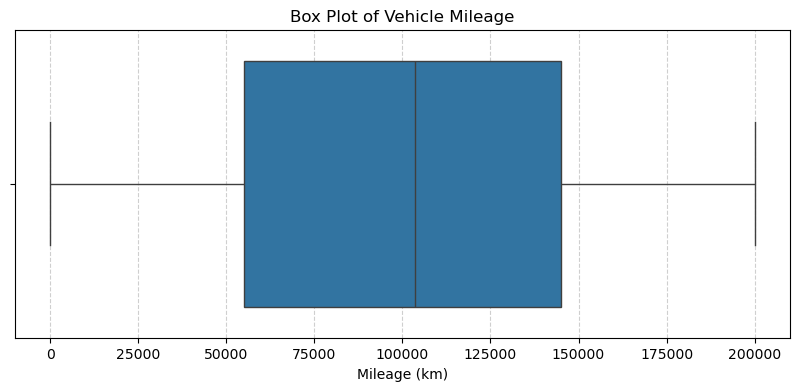

In [174]:
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['mileage_number'])
plt.title('Box Plot of Vehicle Mileage')
plt.xlabel('Mileage (km)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [175]:
df1[df1['mileage_number']>200000]

,engine_volume_float,mileage_number,Price


In [176]:
df1 = df1[df1['mileage_number'] < 200000]

In [177]:
df1.shape

(14742, 3)

In [178]:
df1.skew()

engine_volume_float      1.569765
mileage_number          -0.158357
Price                  119.690452
dtype: float64

In [179]:
from sklearn.preprocessing import PowerTransformer
pt_price = PowerTransformer(method='yeo-johnson')
pt = PowerTransformer(method='yeo-johnson')
df1['engine_volume_float'] = pt.fit_transform(df1[['engine_volume_float']])
df1['Price'] = pt_price.fit_transform(df1[['Price']])


In [180]:
df1.skew()

engine_volume_float   -0.107180
mileage_number        -0.158357
Price                  0.433565
dtype: float64

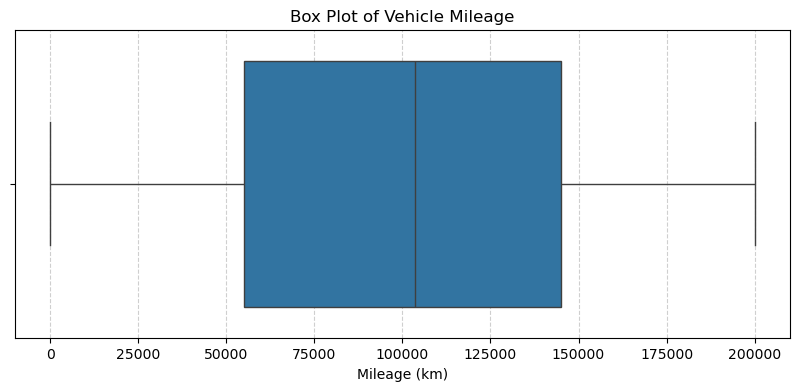

In [181]:
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['mileage_number'])
plt.title('Box Plot of Vehicle Mileage')
plt.xlabel('Mileage (km)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [182]:
corr=df1.corr()

In [183]:
corr

,engine_volume_float,mileage_number,Price
engine_volume_float,1.000000,0.069455,0.085803
mileage_number,0.069455,1.000000,-0.070463
Price,0.085803,-0.070463,1.000000


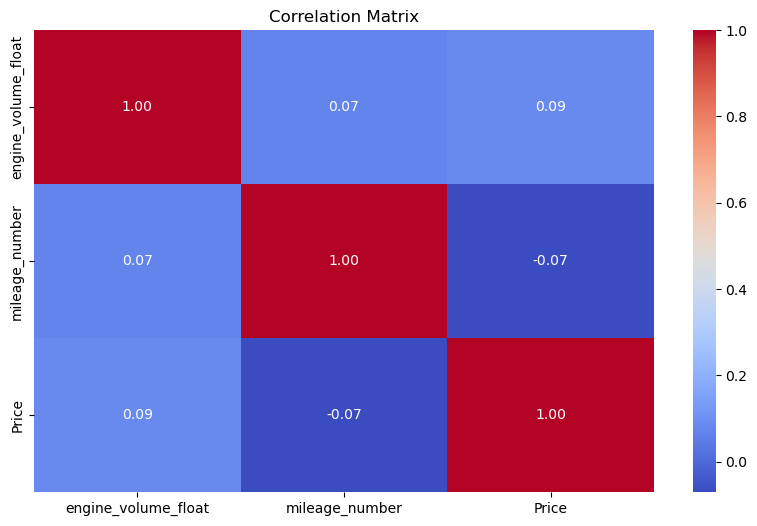

In [184]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

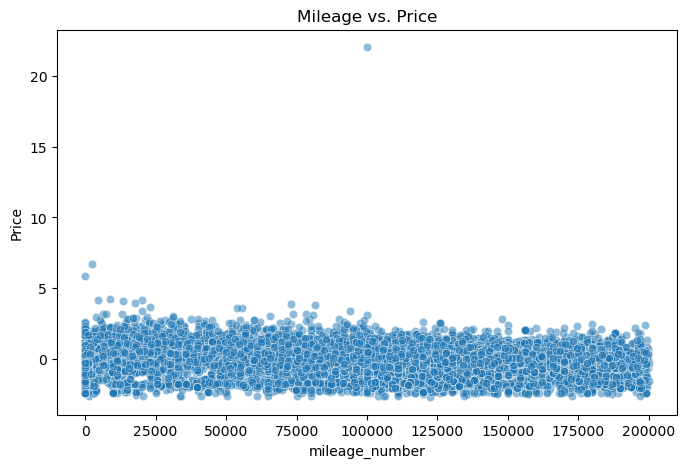

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage_number', y='Price', data=df1, alpha=0.5)
plt.title('Mileage vs. Price')
plt.show()

In [186]:
X=df1[['mileage_number','engine_volume_float']]
y=df1['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [187]:
predictions = model.predict(X_test)

In [188]:
r2_score = model.score(X_test, y_test)
r2_score

0.008708755342343277

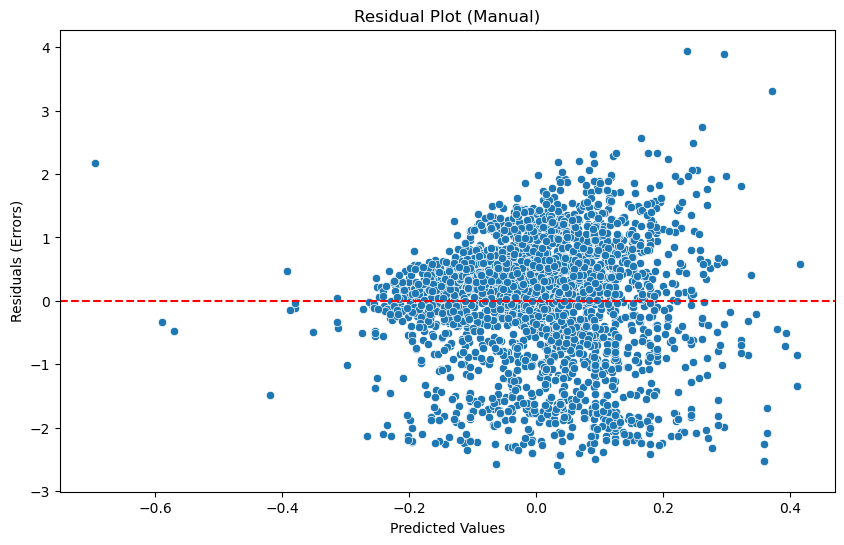

In [189]:
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Manual)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.show()

In [190]:
df1['Age']=2025-df['Prod. year']
df1

,engine_volume_float,mileage_number,Price,Age
0,1.513569,186005,0.040761,15
1,1.075937,192000,0.231355,14
3,0.539527,168966,-0.875239,14
4,-1.468064,91901,-0.064502,11
5,-0.137587,160931,1.103003,9
...,...,...,...,...
19231,1.513569,107800,-0.580135,12
19233,0.417092,161600,0.179954,14
19234,-0.137587,116365,0.659814,15
19235,-0.137587,51258,-0.635612,18


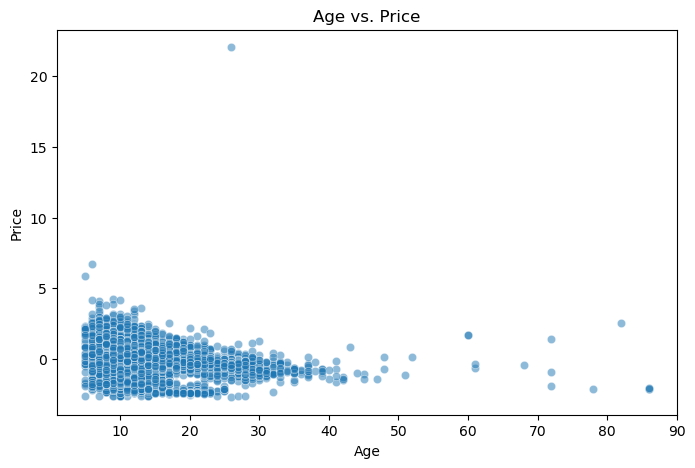

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Price', data=df1, alpha=0.5)
plt.title('Age vs. Price')
plt.show()

In [192]:
X=df1[['mileage_number','engine_volume_float','Age']]
y=df1['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [193]:
predictions = model.predict(X_test)

In [194]:
r2_score = model.score(X_test, y_test)
r2_score

0.05772096347651512

In [195]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float,mileage_number
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,186005
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,192000
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,168966
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,91901
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4,2.0,160931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,3.5,107800
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,2.4,161600
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,2.0,116365
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,2.0,51258


In [196]:
df['Manufacturer'].unique().size

64

In [197]:
df['Category'].unique().size

11

In [198]:
df['Gear box type'].unique().size

4

In [199]:
df[df['mileage_number']>200000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float,mileage_number


In [200]:
df=df[df['mileage_number']<200000]
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float,mileage_number
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,186005
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,192000
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,168966
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,91901
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4,2.0,160931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,3.5,107800
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,2.4,161600
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,2.0,116365
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,2.0,51258


In [201]:
cols=['Manufacturer','Category','Leather interior','Feul type','Gear box type']

In [202]:
df['Manufacturer'].value_counts()

Manufacturer
HYUNDAI          3024
TOYOTA           2748
MERCEDES-BENZ    1305
CHEVROLET         974
FORD              862
                 ... 
SATURN              1
SAAB                1
ASTON MARTIN        1
ZAZ                 1
GREATWALL           1
Name: count, Length: 64, dtype: int64

In [203]:
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['Manufacturer'])
df['Manufacturer_encoded'] = encoder.fit_transform(df['Manufacturer'], df['Price'])
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float,mileage_number,Manufacturer_encoded
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,186005,21383.840796
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,...,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,192000,15311.510267
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,...,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,168966,17034.216937
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,...,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,91901,15412.767750
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,...,4.0,Automatic,Front,04-May,Left wheel,White,4,2.0,160931,24746.901786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,...,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,3.5,107800,21484.366284
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,...,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,2.4,161600,24746.901786
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,...,4.0,Automatic,Front,04-May,Left wheel,Grey,4,2.0,116365,24746.901786
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,...,4.0,Automatic,Front,04-May,Left wheel,Black,4,2.0,51258,15311.510267


In [204]:
encoder = ce.TargetEncoder(cols=['Fuel type'])
df['Fuel type'] = encoder.fit_transform(df['Fuel type'], df['Price'])
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float,mileage_number,Manufacturer_encoded
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,12482.309049,3.5,...,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,3.5,186005,21383.840796
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,18623.903853,3,...,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,3.0,192000,15311.510267
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,12482.309049,2.5,...,4.0,Automatic,4x4,04-May,Left wheel,White,0,2.5,168966,17034.216937
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,18623.903853,1.3,...,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1.3,91901,15412.767750
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,35407.556246,2,...,4.0,Automatic,Front,04-May,Left wheel,White,4,2.0,160931,24746.901786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,35407.556246,3.5,...,6.0,Automatic,Rear,04-May,Left wheel,Grey,12,3.5,107800,21484.366284
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,18623.903853,2.4,...,4.0,Tiptronic,Front,04-May,Left wheel,Red,8,2.4,161600,24746.901786
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,35407.556246,2,...,4.0,Automatic,Front,04-May,Left wheel,Grey,4,2.0,116365,24746.901786
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,35407.556246,2,...,4.0,Automatic,Front,04-May,Left wheel,Black,4,2.0,51258,15311.510267


In [205]:
encoder = ce.TargetEncoder(cols=['Gear box type'])
df['Gear box type'] = encoder.fit_transform(df['Gear box type'], df['Price'])
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float,mileage_number,Manufacturer_encoded
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,12482.309049,3.5,...,6.0,17765.414401,4x4,04-May,Left wheel,Silver,12,3.5,186005,21383.840796
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,18623.903853,3,...,6.0,28023.460118,4x4,04-May,Left wheel,Black,8,3.0,192000,15311.510267
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,12482.309049,2.5,...,4.0,17765.414401,4x4,04-May,Left wheel,White,0,2.5,168966,17034.216937
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,18623.903853,1.3,...,4.0,17765.414401,Front,04-May,Left wheel,Silver,4,1.3,91901,15412.767750
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,35407.556246,2,...,4.0,17765.414401,Front,04-May,Left wheel,White,4,2.0,160931,24746.901786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,35407.556246,3.5,...,6.0,17765.414401,Rear,04-May,Left wheel,Grey,12,3.5,107800,21484.366284
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,18623.903853,2.4,...,4.0,28023.460118,Front,04-May,Left wheel,Red,8,2.4,161600,24746.901786
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,35407.556246,2,...,4.0,17765.414401,Front,04-May,Left wheel,Grey,4,2.0,116365,24746.901786
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,35407.556246,2,...,4.0,17765.414401,Front,04-May,Left wheel,Black,4,2.0,51258,15311.510267


In [206]:
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,engine_volume_float,mileage_number,Manufacturer_encoded
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,1,12482.309049,3.5,...,6.0,17765.414401,4x4,04-May,Left wheel,Silver,12,3.5,186005,21383.840796
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,18623.903853,3,...,6.0,28023.460118,4x4,04-May,Left wheel,Black,8,3.0,192000,15311.510267
3,45769185,3607,862,FORD,Escape,2011,Jeep,1,12482.309049,2.5,...,4.0,17765.414401,4x4,04-May,Left wheel,White,0,2.5,168966,17034.216937
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,1,18623.903853,1.3,...,4.0,17765.414401,Front,04-May,Left wheel,Silver,4,1.3,91901,15412.767750
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,1,35407.556246,2,...,4.0,17765.414401,Front,04-May,Left wheel,White,4,2.0,160931,24746.901786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,1,35407.556246,3.5,...,6.0,17765.414401,Rear,04-May,Left wheel,Grey,12,3.5,107800,21484.366284
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,1,18623.903853,2.4,...,4.0,28023.460118,Front,04-May,Left wheel,Red,8,2.4,161600,24746.901786
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,1,35407.556246,2,...,4.0,17765.414401,Front,04-May,Left wheel,Grey,4,2.0,116365,24746.901786
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,1,35407.556246,2,...,4.0,17765.414401,Front,04-May,Left wheel,Black,4,2.0,51258,15311.510267


In [207]:
df = pd.get_dummies(df, columns=['Category'], drop_first=True,dtype=int)

In [208]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Leather interior,Fuel type,Engine volume,Mileage,...,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,45654403,13328,1399,LEXUS,RX 450,2010,1,12482.309049,3.5,186005 km,...,0,0,0,1,0,0,0,0,0,0
1,44731507,16621,1018,CHEVROLET,Equinox,2011,0,18623.903853,3,192000 km,...,0,0,0,1,0,0,0,0,0,0
3,45769185,3607,862,FORD,Escape,2011,1,12482.309049,2.5,168966 km,...,0,0,0,1,0,0,0,0,0,0
4,45809263,11726,446,HONDA,FIT,2014,1,18623.903853,1.3,91901 km,...,0,0,1,0,0,0,0,0,0,0
5,45802912,39493,891,HYUNDAI,Santa FE,2016,1,35407.556246,2,160931 km,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,1,35407.556246,3.5,107800 km,...,0,0,0,0,0,0,0,0,1,0
19233,45778856,15681,831,HYUNDAI,Sonata,2011,1,18623.903853,2.4,161600 km,...,0,0,0,0,0,0,0,0,1,0
19234,45804997,26108,836,HYUNDAI,Tucson,2010,1,35407.556246,2,116365 km,...,0,0,0,1,0,0,0,0,0,0
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,1,35407.556246,2,51258 km,...,0,0,0,1,0,0,0,0,0,0


In [209]:
df2=df1[['Age','mileage_number','engine_volume_float']]
df2

,Age,mileage_number,engine_volume_float
0,15,186005,1.513569
1,14,192000,1.075937
3,14,168966,0.539527
4,11,91901,-1.468064
5,9,160931,-0.137587
...,...,...,...
19231,12,107800,1.513569
19233,14,161600,0.417092
19234,15,116365,-0.137587
19235,18,51258,-0.137587


In [210]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'engine_volume_float', 'mileage_number',
       'Manufacturer_encoded', 'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep', 'Category_Limousine',
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup',
       'Category_Sedan', 'Category_Universal'],
      dtype='object')

In [211]:
df2=df[['Manufacturer_encoded','Leather interior','Fuel type','Gear box type','Airbags'
        ,'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep', 'Category_Limousine',
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup',
       'Category_Sedan', 'Category_Universal']]
df2

,Manufacturer_encoded,Leather interior,Fuel type,Gear box type,Airbags,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal
0,21383.840796,1,12482.309049,17765.414401,12,0,0,0,1,0,0,0,0,0,0
1,15311.510267,0,18623.903853,28023.460118,8,0,0,0,1,0,0,0,0,0,0
3,17034.216937,1,12482.309049,17765.414401,0,0,0,0,1,0,0,0,0,0,0
4,15412.767750,1,18623.903853,17765.414401,4,0,0,1,0,0,0,0,0,0,0
5,24746.901786,1,35407.556246,17765.414401,4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,21484.366284,1,35407.556246,17765.414401,12,0,0,0,0,0,0,0,0,1,0
19233,24746.901786,1,18623.903853,28023.460118,8,0,0,0,0,0,0,0,0,1,0
19234,24746.901786,1,35407.556246,17765.414401,4,0,0,0,1,0,0,0,0,0,0
19235,15311.510267,1,35407.556246,17765.414401,4,0,0,0,1,0,0,0,0,0,0


In [212]:
df2=df = pd.concat([df2, df1], axis=1)
df2

,Manufacturer_encoded,Leather interior,Fuel type,Gear box type,Airbags,Category_Coupe,Category_Goods wagon,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,engine_volume_float,mileage_number,Price,Age
0,21383.840796,1,12482.309049,17765.414401,12,0,0,0,1,0,0,0,0,0,0,1.513569,186005,0.040761,15
1,15311.510267,0,18623.903853,28023.460118,8,0,0,0,1,0,0,0,0,0,0,1.075937,192000,0.231355,14
3,17034.216937,1,12482.309049,17765.414401,0,0,0,0,1,0,0,0,0,0,0,0.539527,168966,-0.875239,14
4,15412.767750,1,18623.903853,17765.414401,4,0,0,1,0,0,0,0,0,0,0,-1.468064,91901,-0.064502,11
5,24746.901786,1,35407.556246,17765.414401,4,0,0,0,1,0,0,0,0,0,0,-0.137587,160931,1.103003,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,21484.366284,1,35407.556246,17765.414401,12,0,0,0,0,0,0,0,0,1,0,1.513569,107800,-0.580135,12
19233,24746.901786,1,18623.903853,28023.460118,8,0,0,0,0,0,0,0,0,1,0,0.417092,161600,0.179954,14
19234,24746.901786,1,35407.556246,17765.414401,4,0,0,0,1,0,0,0,0,0,0,-0.137587,116365,0.659814,15
19235,15311.510267,1,35407.556246,17765.414401,4,0,0,0,1,0,0,0,0,0,0,-0.137587,51258,-0.635612,18


In [213]:
df2.skew()

Manufacturer_encoded     5.928297
Leather interior        -1.007928
Fuel type                1.014254
Gear box type            1.421924
Airbags                  0.093053
Category_Coupe           5.554159
Category_Goods wagon    10.722311
Category_Hatchback       1.854160
Category_Jeep            0.960223
Category_Limousine      38.360137
Category_Microbus        9.041721
Category_Minivan         5.055299
Category_Pickup         20.163958
Category_Sedan           0.210374
Category_Universal       7.143476
engine_volume_float     -0.107180
mileage_number          -0.158357
Price                    0.433565
Age                      2.553431
dtype: float64

In [214]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df2['Manufacturer_encoded'] = pt.fit_transform(df2[['Manufacturer_encoded']])
df2['Fuel type'] = pt.fit_transform(df2[['Fuel type']])
df2['Gear box type'] = pt.fit_transform(df2[['Gear box type']])

In [215]:
df2.skew()

Manufacturer_encoded    -0.185257
Leather interior        -1.007928
Fuel type                0.005246
Gear box type            0.000000
Airbags                  0.093053
Category_Coupe           5.554159
Category_Goods wagon    10.722311
Category_Hatchback       1.854160
Category_Jeep            0.960223
Category_Limousine      38.360137
Category_Microbus        9.041721
Category_Minivan         5.055299
Category_Pickup         20.163958
Category_Sedan           0.210374
Category_Universal       7.143476
engine_volume_float     -0.107180
mileage_number          -0.158357
Price                    0.433565
Age                      2.553431
dtype: float64

In [216]:
corr=df2.corr()

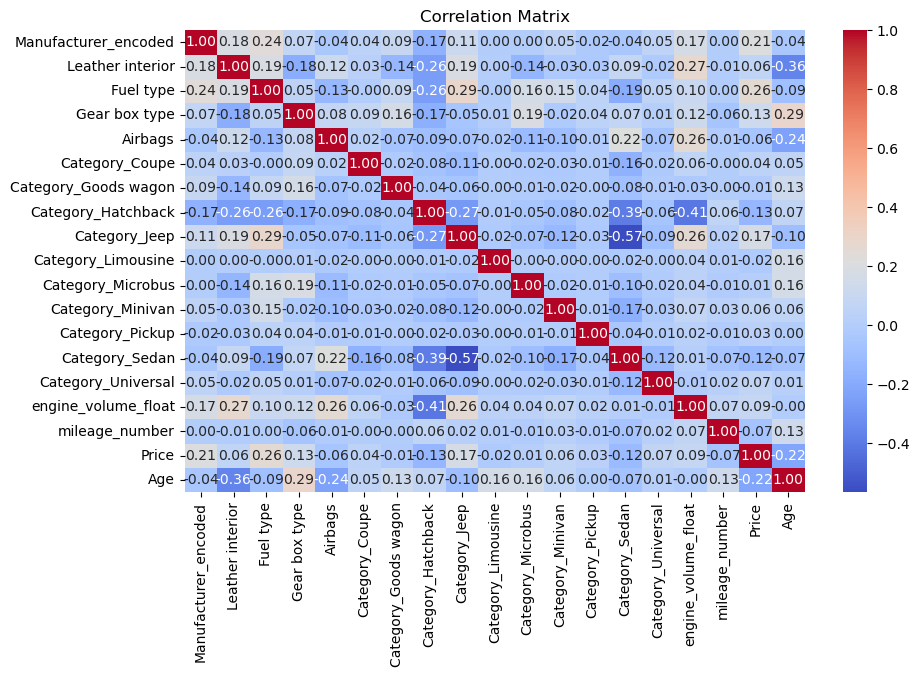

In [217]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

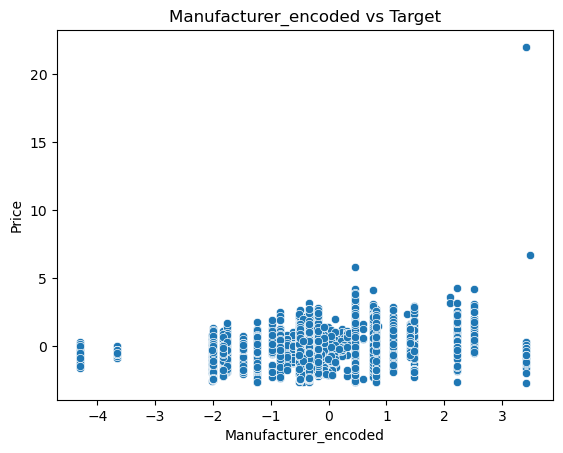

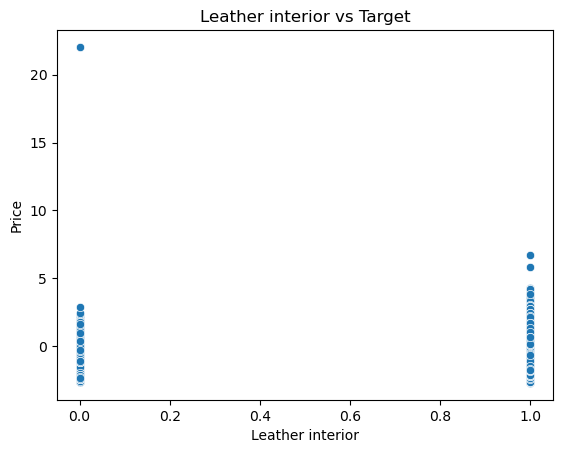

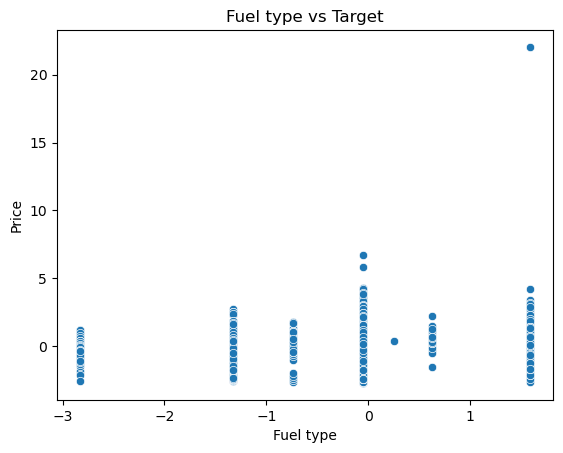

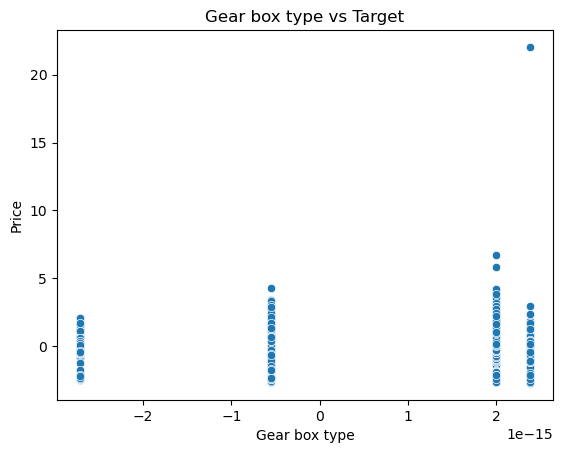

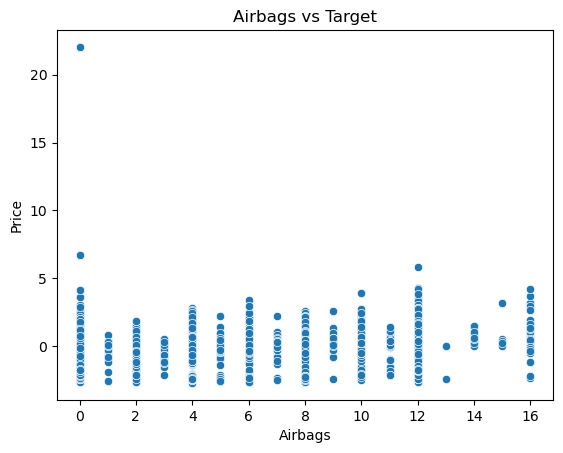

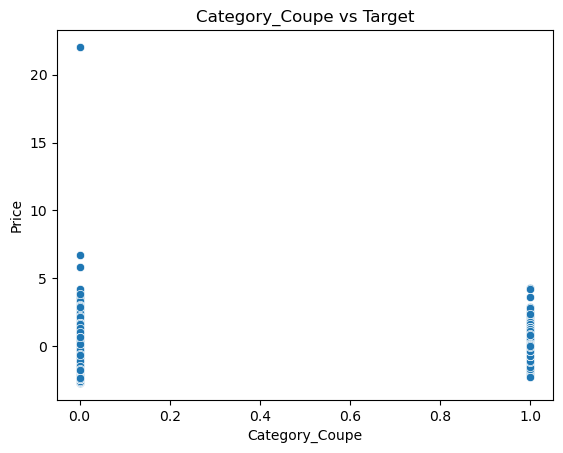

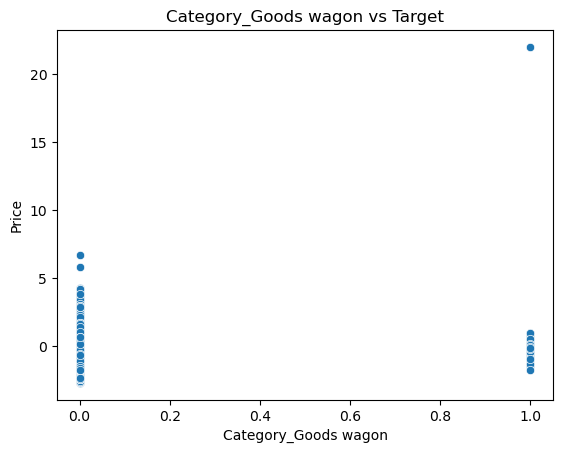

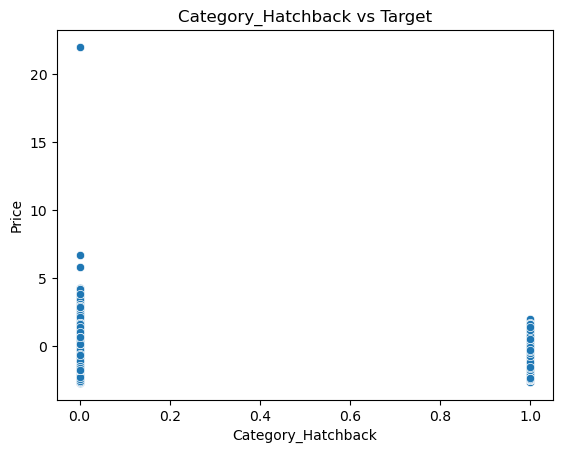

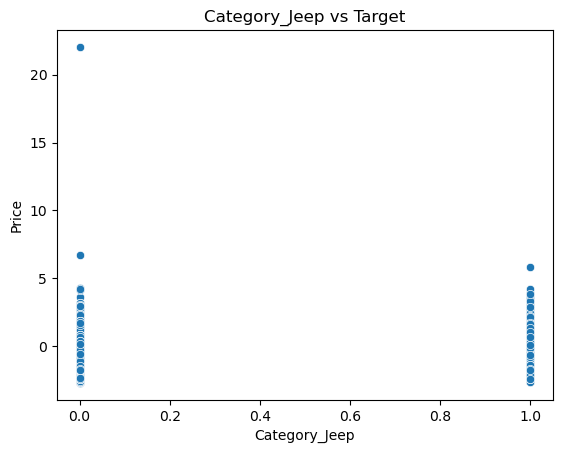

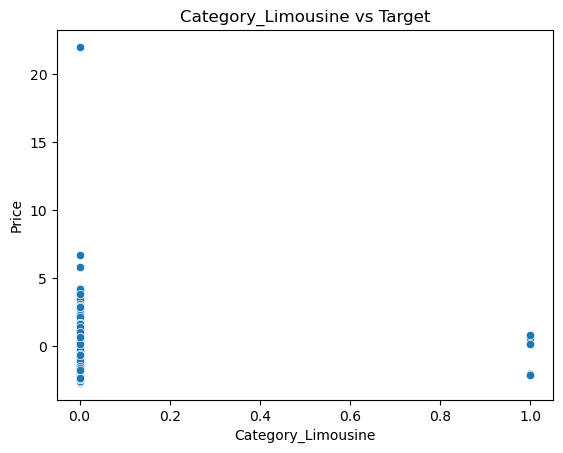

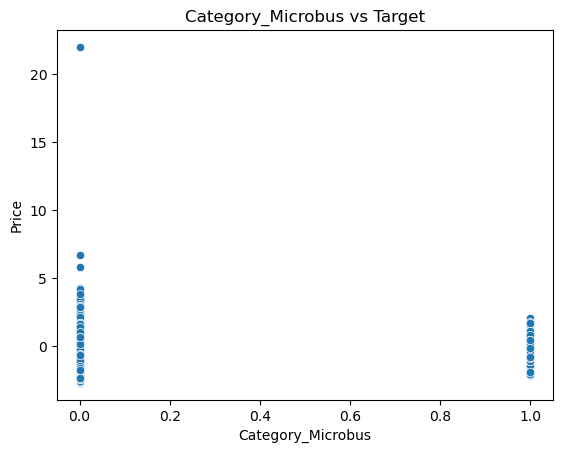

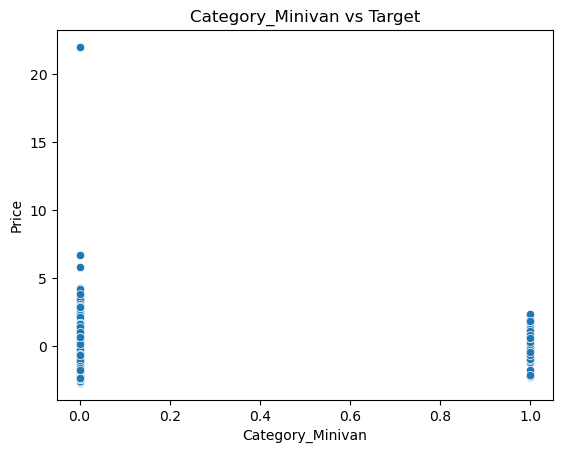

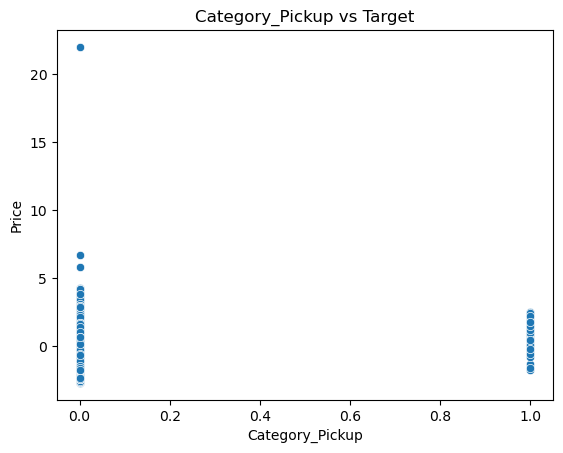

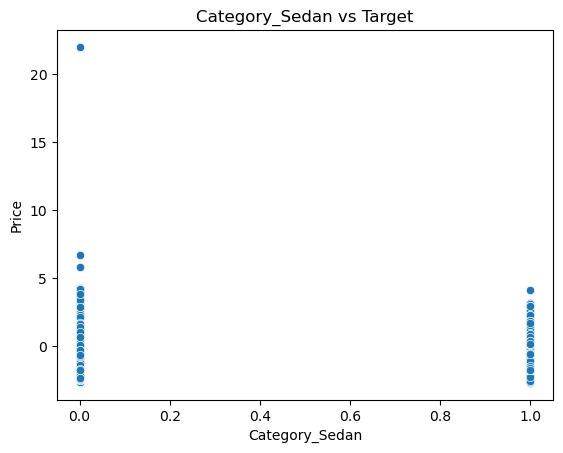

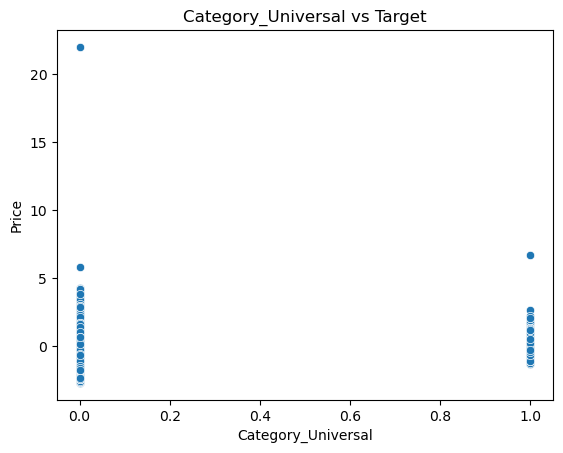

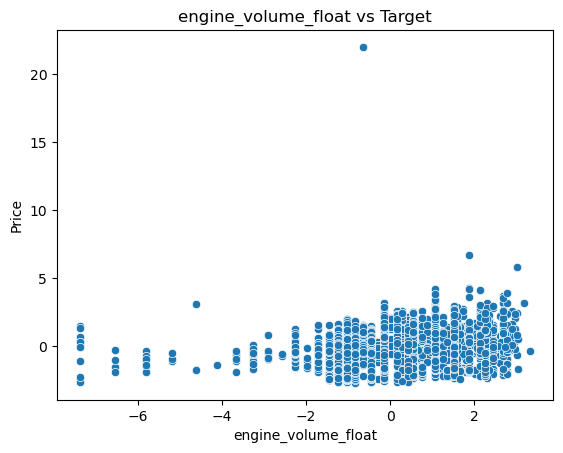

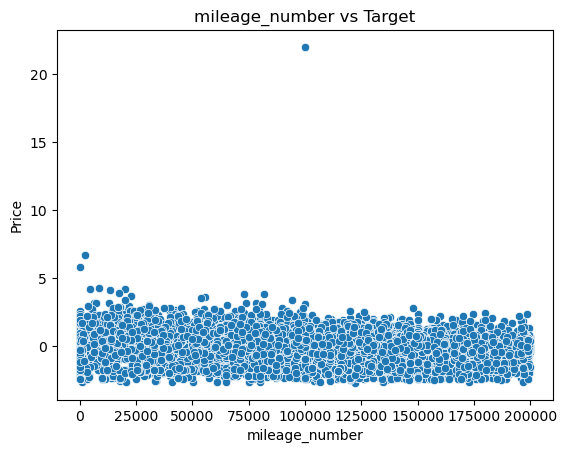

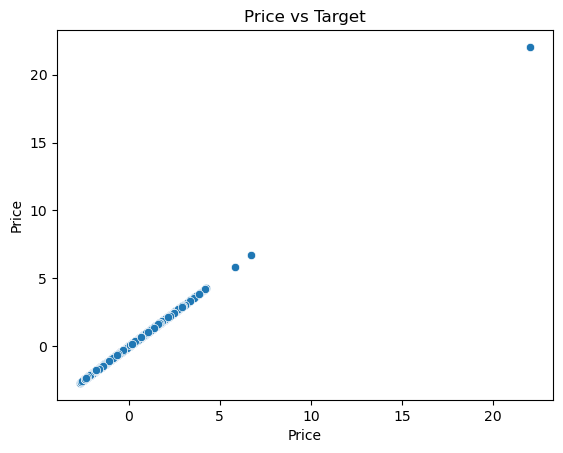

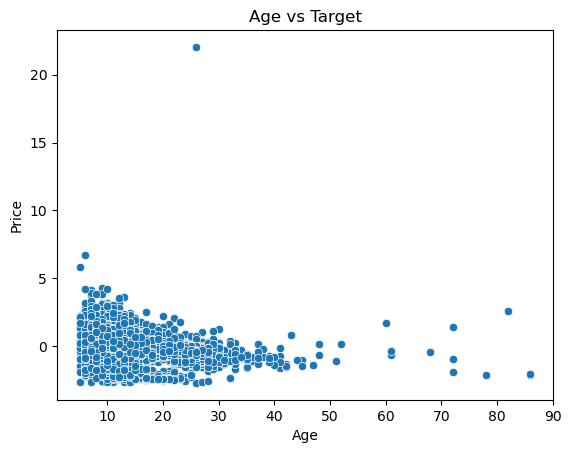

In [218]:
for col in df2.columns:
    sns.scatterplot(x=df2[col], y=df2['Price'])
    plt.title(f"{col} vs Target")
    plt.show()

In [219]:
X=df2[['Manufacturer_encoded','Leather interior','Fuel type','Gear box type','Airbags'
        ,'Category_Coupe', 'Category_Goods wagon',
       'Category_Hatchback', 'Category_Jeep', 'Category_Limousine',
       'Category_Microbus', 'Category_Minivan', 'Category_Pickup',
       'Category_Sedan', 'Category_Universal'
       ,'mileage_number','engine_volume_float']]
y=df2['Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [220]:
predictions = model.predict(X_test)

In [221]:
r2_score = model.score(X_test, y_test)
r2_score

0.11039876404663773

In [222]:
y_pred_original = pt_price.inverse_transform(predictions.reshape(-1, 1))
y_true_original = pt_price.inverse_transform(y_test.values.reshape(-1, 1))

c:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [223]:
y_pred_original = y_pred_original.flatten()
y_true_original = y_true_original.flatten()

In [224]:
mae = mean_absolute_error(y_true_original, y_pred_original)
mae

11317.867743085642

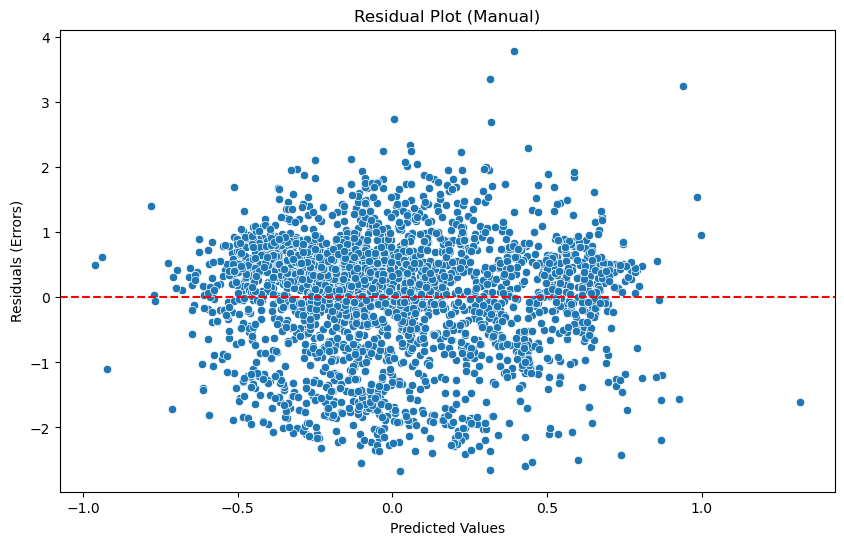

In [225]:
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Manual)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Errors)')
plt.show()